<a href="https://colab.research.google.com/github/Pilarppk/SIM_YAC_PARRALES_UPSE2023/blob/main/implicita%20qvs%20p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy  as np
import math

In [15]:

L=30000
dx=6000
Tiempo=100
DT=1
K=50 #Permeabilidad MD
por=0.5
vis=1 # centipoise
Beta=0.7
CompTotal=1.2*10**(-6) #ps1-1
A=200000#ft^2

In [17]:

Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

2.314814814814815

In [18]:
#Condiciones inicialea
Pyac=2000
Piz=7000
Pder=0
Pin=np.ones((L//dx)+2)
Qres=np.zeros((L//dx))
Pres=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[3]=7000
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin.shape

(7,)

In [19]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))
Qimplicita=np.zeros((Tiempo//DT,(L//dx)))
Pres=np.zeros((L//dx)+2)
Pin=np.ones((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Baccumul=A*dx*por*CompTotal/Beta
Transmisibilidad=(K*A/(vis*Beta*dx))*6.33*10**-3
B=np.zeros([N-2,N-2])
T=np.zeros([N-2,N-2])
Transmisibilidad

15.071428571428571

In [20]:
for i in range(0,N-2):
  B[i,i]=Baccumul


for i in range(0,N-2):
  T[i,i]=2*Transmisibilidad
  if i>0:
    T[i,i-1]=-Transmisibilidad
  if i<(N-3):
    T[i,i+1]=-Transmisibilidad
#T[0,0]=3*Transmisibilidad
T[0,0]=2*Transmisibilidad
T[N-3,N-3]=2*Transmisibilidad


In [21]:
Matriz_resolucion=np.zeros_like(T)
Vector_sol=np.zeros_like(Pin[1:-1])
Matriz_resolucion=T+(B/DT)
Vector_sol=np.matmul(B/DT,Pin[1:-1])
#Pres=[]

Q=np.zeros_like(Vector_sol)
Q[0]=2*Transmisibilidad*Piz
Vector_sol=Vector_sol+Q
Vector_sol
Transmisibilidad

15.071428571428571

In [9]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)

In [22]:
Qimplicita[0]=Q
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pres[3]=7000
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(B/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol
  t=t+DT

In [23]:
Qimplicita


array([[ 211000.        ,       0.        ,       0.        ,
              0.        ,       0.        ],
       [2443886.4024872 , 2059645.09387734, 2057172.54818955,
        2056726.31090176, 2027852.27327334],
       [2614695.5587581 , 2064508.89145442, 2057259.12040642,
        2055917.59543842, 1999384.1146791 ],
       [2780742.5264606 , 2071600.38427681, 2057427.42049333,
        2054740.33941843, 1971709.71953827],
       [2942192.79007222, 2080792.1962925 , 2057700.10026581,
        2053217.42946985, 1944801.56787001],
       [3099205.39728768, 2091963.13534664, 2058097.75672114,
        2051371.01770152, 1918633.23856856],
       [3251933.22616701, 2104997.90191852, 2058639.06409266,
        2049222.53029467, 1893179.36778298],
       [3400523.24072625, 2119786.81156169, 2059340.89832891,
        2046792.67704824, 1868415.60861774],
       [3545116.7354859 , 2136225.53039783, 2060218.45441122,
        2044101.46176727, 1844318.59212848],
       [3685849.56946834, 2154214.823

In [24]:
Pimplicita

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [7000.        , 2170.8617802 , 2002.43273016, 7000.        ,
        1999.59502449, 1971.52304346,    0.        ],
       [7000.        , 2336.92623768, 2007.16142225, 7000.        ,
        1998.80877334, 1943.84566705,    0.        ],
       [7000.        , 2498.36078961, 2014.05592916, 7000.        ,
        1997.66421888, 1916.94000511,    0.        ],
       [7000.        , 2655.32632368, 2022.99241306, 7000.        ,
        1996.18361198, 1890.7793021 ,    0.        ],
       [7000.        , 2807.97746959, 2033.85304825, 7000.        ,
        1994.38848943, 1865.33787083,    0.        ],
       [7000.        , 2956.46285877, 2046.52573798, 7000.        ,
        1992.29968223, 1840.59105201,    0.        ],
       [7000.        , 3100.92537293, 2060.90384457, 7000.        ,
        1989.93732491, 1816.51517505,    0.        ],
       [7000.        , 3

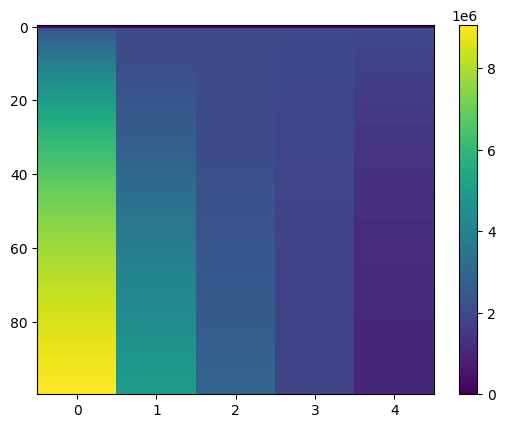

In [25]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()

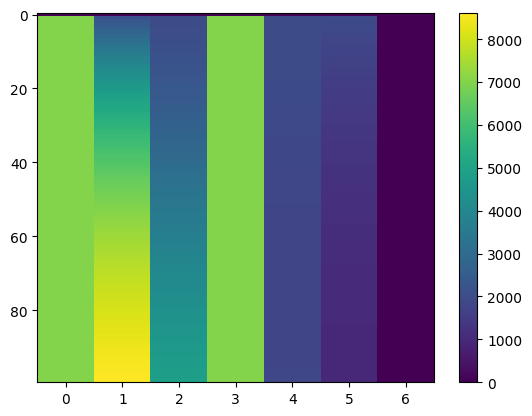

In [26]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()